In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from random import randint
from sklearn import linear_model
from sklearn import metrics

# Import the data

In [2]:
# import training dataset
dataset = pd.read_csv('fashion-mnist_train.csv')
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# import testing dataset
testset = pd.read_csv('fashion-mnist_test.csv')

# Define the data input X, and target Y

In [22]:
#X is the input feature
X = dataset[dataset.columns[1:]]
#Y is the target/class label
Y = np.array(dataset['label'])

# Show some of the images

T-shirt/top


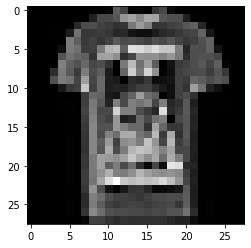

Ankle boot


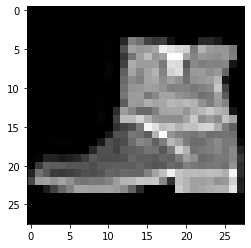

Sandal


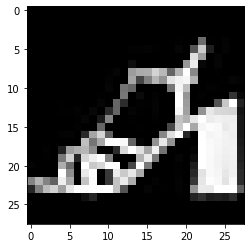

Pullover


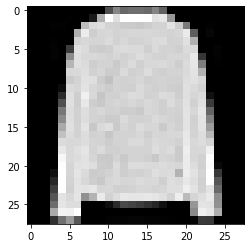

Ankle boot


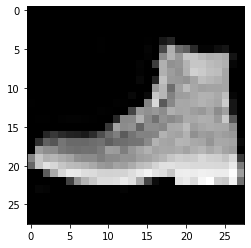

In [5]:
# create a sample of images from the dataset
classes = {0: 'T-shirt/top', 1:'Trouser', 2: 'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
for i in range(0, 5):
    #choose a random one from training set
    sample = randint(0, X.shape[0])                
    print(classes[Y[sample]])
    image = (X.iloc[sample].values.reshape(28, 28))
    plt.imshow(image, cmap='gray')
    plt.show()

In [6]:
#X = X/255

# Split the imported data to training, testing and validation set

In [23]:
X_train = dataset[dataset.columns[1:]]
Y_train = np.array(dataset['label'])
X_test = testset[dataset.columns[1:]]
Y_test = np.array(testset['label'])
#split data into training and validation set
from sklearn.model_selection import train_test_split
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)


print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


# Normalization

In [24]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

# First model: Logistic Regression

In [10]:
#define model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=1000,multi_class='multinomial')

In [11]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
model.score(X_test, Y_test)

0.8538

In [13]:
model.predict(X_test)

array([0, 1, 2, ..., 8, 6, 1], dtype=int64)

In [36]:
# I used the weighted classification accuracy
def weighted_accuracy(confusion):
    #input: confusion is the confusion matrix
    #output: acc is the weighted classification accuracy
    M=confusion.copy().astype('float32')
    for k in range(0, M.shape[0]):
        M[k]/=M[k].sum()+1e-8    
    acc = M.diagonal().sum()/M.sum()
    return acc

classification accuracy on validation set is  0.85510826
classification accuracy on test set is  0.8538


Text(69.0, 0.5, 'Truth')

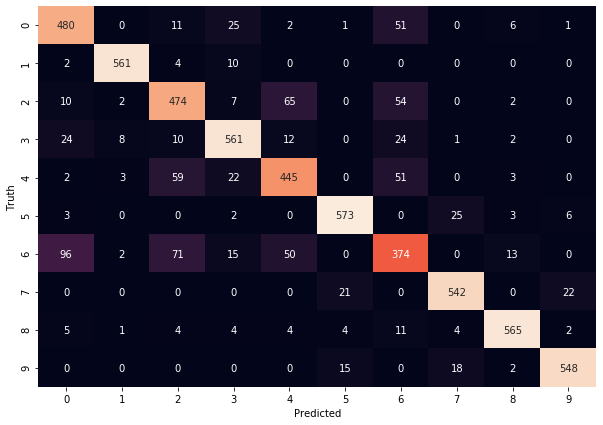

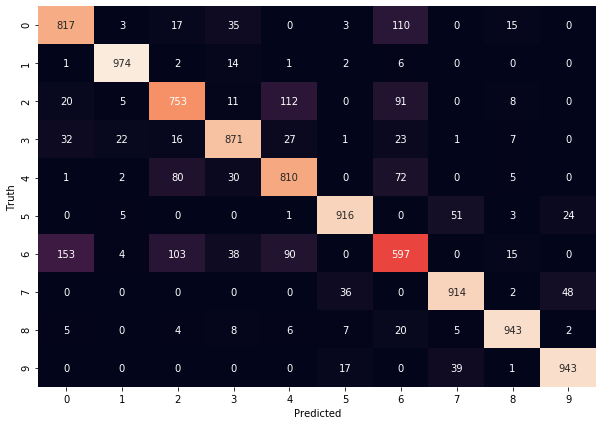

In [15]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#confusion matrix for validation set
Y_val_pred=model.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
print('classification accuracy on validation set is ', acc_val)
#plot confusion matrix using seanborn to see the details of wrong classified
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_val, annot=True,cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#confusion matrix for test set
Y_test_pred=model.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on test set is ', acc_test)
#plot confusion matrix using seanborn
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_test, annot=True,cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using the grid search to do hyperparameters tuning

In [21]:
# Set up the parameter
#modify solver, iteration times and different multiclass 
LR_model_hyperparameters = [
 { 
  'C':[0.5,1,2],
  'solver': ['newton-cg','sag'],
  'max_iter':[1000,5000],
  'multi_class': ['auto']
  }
]

In [22]:
from sklearn.model_selection import GridSearchCV
# Perform the search
LR_tuned_model = GridSearchCV(LogisticRegression(), LR_model_hyperparameters, cv=2, verbose = 2)
LR_tuned_model.fit(X_train, Y_train)

# Print details
hyperparameters_list = dict()
hyperparameters_list[''] = LR_tuned_model.best_params_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] C=0.5, max_iter=1000, multi_class=auto, solver=newton-cg ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.5, max_iter=1000, multi_class=auto, solver=newton-cg, total=  40.5s
[CV] C=0.5, max_iter=1000, multi_class=auto, solver=newton-cg ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.5s remaining:    0.0s


[CV]  C=0.5, max_iter=1000, multi_class=auto, solver=newton-cg, total=  41.5s
[CV] C=0.5, max_iter=1000, multi_class=auto, solver=sag ..............
[CV]  C=0.5, max_iter=1000, multi_class=auto, solver=sag, total= 2.0min
[CV] C=0.5, max_iter=1000, multi_class=auto, solver=sag ..............
[CV]  C=0.5, max_iter=1000, multi_class=auto, solver=sag, total= 2.4min
[CV] C=0.5, max_iter=5000, multi_class=auto, solver=newton-cg ........
[CV]  C=0.5, max_iter=5000, multi_class=auto, solver=newton-cg, total=  40.9s
[CV] C=0.5, max_iter=5000, multi_class=auto, solver=newton-cg ........
[CV]  C=0.5, max_iter=5000, multi_class=auto, solver=newton-cg, total=  41.5s
[CV] C=0.5, max_iter=5000, multi_class=auto, solver=sag ..............
[CV]  C=0.5, max_iter=5000, multi_class=auto, solver=sag, total= 2.1min
[CV] C=0.5, max_iter=5000, multi_class=auto, solver=sag ..............
[CV]  C=0.5, max_iter=5000, multi_class=auto, solver=sag, total= 2.4min
[CV] C=1, max_iter=1000, multi_class=auto, solver=ne

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 58.5min finished


In [23]:
print(LR_tuned_model.best_score_)

0.8495


In [24]:
print(LR_tuned_model.best_estimator_)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [25]:
#The weighted accuracy after hyperparameter tuning
y_pred = LR_tuned_model.predict(X_test)
LR_confusion_tuned=confusion_matrix(Y_test, y_pred)
acc_tuned=weighted_accuracy(LR_confusion_tuned)
print("Accuracy: " +  str(acc_tuned))

Accuracy: 0.85620004


# Second model: Random Forest

classification accuracy on validation set is  0.8859192
classification accuracy on test set is  0.883


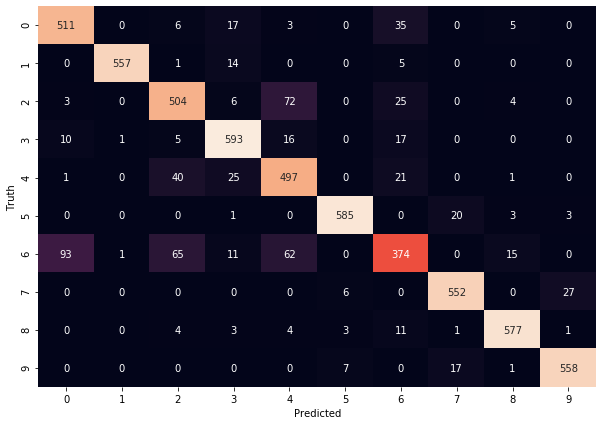

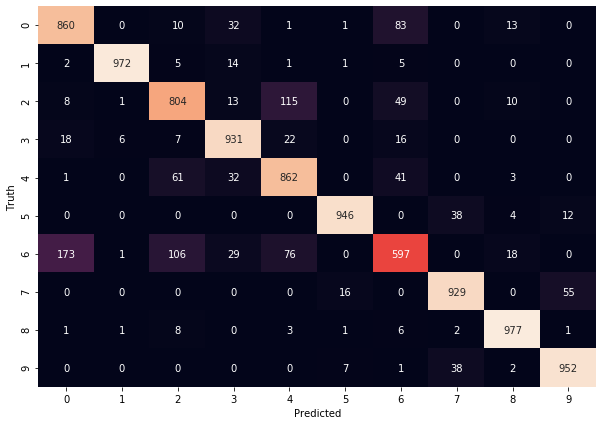

In [26]:
from sklearn.ensemble import RandomForestClassifier
#set class_weight='balanced'
RF=RandomForestClassifier(n_estimators=500, class_weight='balanced', max_depth=20, random_state=0)
RF.fit(X_train, Y_train)
Y_val_pred=RF.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
#plot confusion matrix using seanborn to see the details of wrong classified
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_val, annot=True,cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#test accuracy
Y_test_pred=RF.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
#plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_test, annot=True,cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

In [28]:
# Set up the parameter
RF_model_hyperparameters = [
 { 
    'bootstrap': [True],
    'max_depth': np.arange(1,70,20),
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 500]
  }
]

In [29]:
# Perform the search
RF_tuned_model = GridSearchCV(RandomForestClassifier(), RF_model_hyperparameters, cv=3, verbose = 2)
RF_tuned_model.fit(X_train, Y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.9s
[CV] bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.9s
[CV] bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, total=   6.0s
[CV] bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, total=   6.1s
[CV] bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=1, max_features=2, min_samples_leaf=

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 59.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
print(RF_tuned_model.best_score_)

0.8583333333333333


In [31]:
#The accuracy after hyperparameter tuning
print(RF_tuned_model.best_estimator_)
y_pred_RF = RF_tuned_model.predict(X_test)
RF_confusion_tuned=confusion_matrix(Y_test, y_pred_RF)
acc_tuned_RF=weighted_accuracy(RF_confusion_tuned)
print("Accuracy: " +  str(acc_tuned_RF))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=41, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.8649


# Multilayer perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


classification accuracy on validation set is  0.8821822
classification accuracy on test set is  0.8802


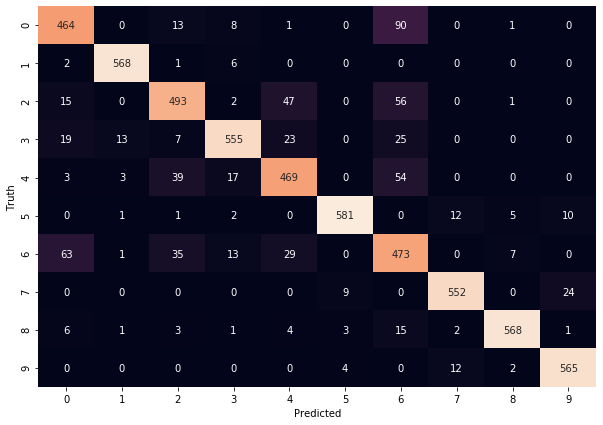

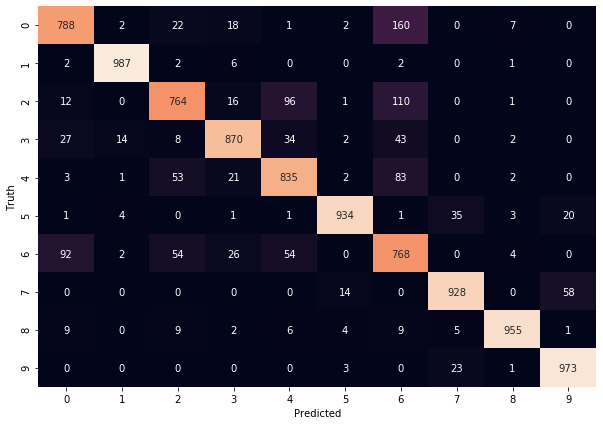

In [43]:
from sklearn.neural_network import MLPClassifier
#set class_weight='balanced'

MLP=MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
MLP.fit(X_train, Y_train)
Y_val_pred=MLP.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
#plot confusion matrix using seanborn to see the details of wrong classified
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_val, annot=True,cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#test accuracy
Y_test_pred=MLP.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
#plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_test, annot=True,cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

In [46]:
# Set up the parameters
MLP_model_hyperparameters = [
  {'hidden_layer_sizes': [(200, 100), (400, 200, 100)], 
   'alpha': [0.0001,0.001,0.01,0.1],
   'activation': [ 'tanh', 'relu'],
   'solver':['adam']
  }
]

In [47]:
# Perform the search
MLP_tuned_model = GridSearchCV(MLPClassifier(), MLP_model_hyperparameters, cv=2, verbose = 2)
MLP_tuned_model.fit(X_train, Y_train)

# Print details
print("Best parameters set found on development set:")
print(MLP_tuned_model.best_params_)
hyperparameters_list = dict()
hyperparameters_list["Tuned Logistic Regression"] = MLP_tuned_model.best_params_
print(MLP_tuned_model.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100), solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100), solver=adam, total= 3.3min
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100), solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100), solver=adam, total= 2.3min
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(400, 200, 100), solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(400, 200, 100), solver=adam, total= 4.4min
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(400, 200, 100), solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(400, 200, 100), solver=adam, total= 4.2min
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100), solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100), solver=adam, total= 2.6min
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100), solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100), solver=adam, total= 3.6min
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(400, 200, 100), solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(400, 200, 100), solver=adam, total= 4.1min
[CV] a

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 120.9min finished


Best parameters set found on development set:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'solver': 'adam'}
0.8866296296296297


In [48]:
#The accuracy after hyperparameter tuning
print(MLP_tuned_model.best_estimator_)
y_pred_MLP = MLP_tuned_model.predict(X_test)
MLP_confusion_tuned=confusion_matrix(Y_test, y_pred_MLP)
acc_tuned_MLP=weighted_accuracy(MLP_confusion_tuned)
print("Accuracy: " +  str(acc_tuned_MLP))

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy: 0.8982999


# 2D Convolutional Neural Network

In [7]:
#Define the 2d cnn model
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D

model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

Using TensorFlow backend.


In [8]:
#visualize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)       

In [9]:
#compile the model using the categorical cross entropy loss function and the optimizer defined the learning rate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#conver the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [31]:
from keras.utils import np_utils

num_classes = 10

Y_train = np_utils.to_categorical(Y_train, num_classes)
#Y_test = np_utils.to_categorical(Y_test, num_classes)
Y_val = np_utils.to_categorical(Y_val, num_classes)

create lists to store the loss and accuracys

In [32]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

In [34]:
def test_acc(model, X, Y):
    acc_test =0 
    num_classes=2
    confusion=np.zeros((num_classes,num_classes), dtype=np.int64)
    Yp=model.predict(X, batch_size=64)
    Y=Y.astype('int64')
    #0.5 is the threshold for classification
    Yp=(Yp.squeeze()>0.5).astype('int64')
    for i in range(0, num_classes):
        for j in range(0, num_classes):
            confusion[i,j]+=np.sum((Y==i)&(Yp==j)).astype('int64') 
    acc_test=weighted_accuracy(confusion)
    return acc_test, confusion

In [38]:
for epoch in range(0, 25):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    #acc_val_list.extend(history.history['val_accuracy'])
    acc_val, confusion_val=test_acc(model, X_val, Y_val)
    acc_val_list.append(acc_val)
    #save the model to a a HDF5 file 
    model.save('fashion_mnist'+str(epoch)+'.h5')

epoch 0
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 124s 2ms/step - loss: 0.1861 - accuracy: 0.9322 - val_loss: 0.2045 - val_accuracy: 0.9257
epoch 1
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 123s 2ms/step - loss: 0.1846 - accuracy: 0.9330 - val_loss: 0.1908 - val_accuracy: 0.9323
epoch 2
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 123s 2ms/step - loss: 0.1828 - accuracy: 0.9338 - val_loss: 0.1803 - val_accuracy: 0.9362
epoch 3
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 122s 2ms/step - loss: 0.1804 - accuracy: 0.9337 - val_loss: 0.1901 - val_accuracy: 0.9332
epoch 4
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 122s 2ms/step - loss: 0.1771 - accuracy: 0.9359 - val_loss: 0.1804 - v

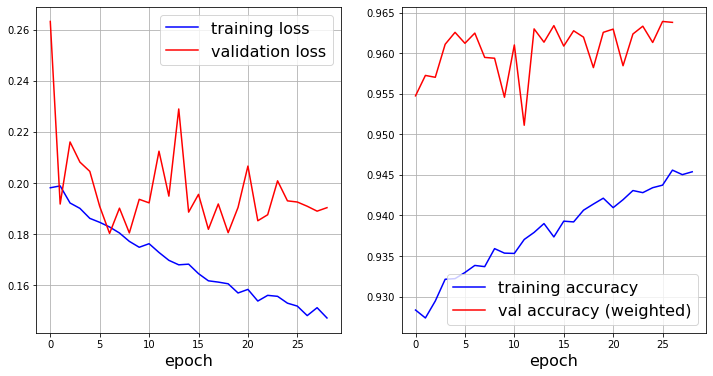

In [39]:
#plot the accuracy vs epochs times relations
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='val accuracy (weighted)')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

In [41]:
#load the best model from the training
from keras.models import load_model
model = load_model('fashion_mnist24.h5')

In [42]:
#test the model's accuracy
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18335752391461282
Test accuracy: 0.9355999827384949


In [44]:
# Get the weighted accuracy from the model
acc_test_2DCNN, confusion_test=test_acc(model, X_test, Y_test)
print('Test accuracy (weighted)', acc_test_2DCNN)
print('confusion_test', confusion_test)

Test accuracy (weighted) 0.9627778
confusion_test [[89402   598]
 [  678  9322]]


In [47]:
accuracy_list =  {'Logistic Regression': acc_tuned, 'Random Forest': acc_tuned_RF,
                  'Multilayer Perceptron': acc_tuned_MLP,'2D CNN': acc_test_2DCNN}

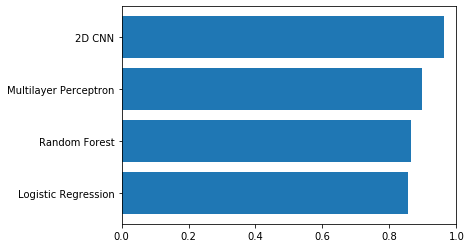

In [48]:
plt.xlim(0, 1.0)
_ = plt.barh(range(len(accuracy_list)), list(accuracy_list.values()), align='center')
_ = plt.yticks(range(len(accuracy_list)), list(accuracy_list.keys()))

The best accuracy we get is from 2D CNN model, which is 96.28%. 